In [2]:
'''https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview'''

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np
import seaborn as sns

# Read the data
X = pd.read_csv('D:/code/Data/house-prices-advanced-regression-techniques/train.csv', index_col='Id')
X_test_full = pd.read_csv('D:/code/Data/house-prices-advanced-regression-techniques/test.csv', index_col='Id')





In [3]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
X.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [5]:
# Remove rows with missing target, separate target from predictors
X.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = X.SalePrice              
X.drop(['SalePrice'], axis=1, inplace=True)

In [6]:
# Break off validation set from training data
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)

# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
low_cardinality_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 100 and 
                        X_train_full[cname].dtype == "object"]

# Select numeric columns
numeric_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = low_cardinality_cols + numeric_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
X_test = X_test_full[my_cols].copy()

# One-hot encode the data
X_train = pd.get_dummies(X_train)
X_valid = pd.get_dummies(X_valid)
X_test = pd.get_dummies(X_test)
X_train, X_valid = X_train.align(X_valid, join='left', axis=1)
X_train, X_test = X_train.align(X_test, join='left', axis=1)





In [46]:
print(X_train)

      MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
Id                                                                            
619           20         90.0    11694            9            5       2007   
871           20         60.0     6600            5            5       1962   
93            30         80.0    13360            5            7       1921   
818           20          NaN    13265            8            5       2002   
303           20        118.0    13704            7            5       2001   
...          ...          ...      ...          ...          ...        ...   
764           60         82.0     9430            8            5       1999   
836           20         60.0     9600            4            7       1950   
1217          90         68.0     8930            6            5       1978   
560          120          NaN     3196            7            5       2003   
685           60         58.0    16770            7 

In [14]:
hyper=pd.DataFrame()
hyper_min=pd.DataFrame()

In [47]:
#iterating through the hyperparameters
'''paramaters to iterate:
    n_estimators
    learning_rate
    early_stopping_rounds
    tree_depth
    
    '''

data=[]

for est in range(10000,10001,1000):
    for learn in np.arange(.099,.100,.001):
        for early in range(99,100):
          
            my_model = XGBRegressor(objective ='reg:squarederror',n_estimators=est, learning_rate=learn, n_jobs=4)
            my_model.fit(X_train, y_train, early_stopping_rounds=early, eval_set=[(X_valid, y_valid)], verbose=2)
            predictions = my_model.predict(X_valid)
            mae=mean_absolute_error(predictions, y_valid)
            
            data.append({'estimators':est,'learning_rate':learn,'early_stopping_rounds':early,'mae':mae})
            print(f'{est} {learn} {early} {mae}')
            
temp_hyper=pd.DataFrame(data)
hyper=hyper.append(temp_hyper, ignore_index=True)
temp_hyper_min=temp_hyper[temp_hyper.mae == temp_hyper.mae.min()]
hyper_min=hyper_min.append(temp_hyper_min, ignore_index=True)

hyper.to_csv(r'D:/code/Data/hyper1.csv')
hyper_min.to_csv(r'D:/code/Data/hyper_min1.csv')
temp_hyper_min.to_csv(r'D:/code/Data/temp_hyper_min1.csv')

[0]	validation_0-rmse:181360
Will train until validation_0-rmse hasn't improved in 99 rounds.
[2]	validation_0-rmse:150341
[4]	validation_0-rmse:125040
[6]	validation_0-rmse:104556
[8]	validation_0-rmse:88407.3
[10]	validation_0-rmse:75804.3
[12]	validation_0-rmse:65495
[14]	validation_0-rmse:58241.9
[16]	validation_0-rmse:52395.6
[18]	validation_0-rmse:47630.7
[20]	validation_0-rmse:44504.8
[22]	validation_0-rmse:41905.7
[24]	validation_0-rmse:40010.8
[26]	validation_0-rmse:38526.5
[28]	validation_0-rmse:37657.1
[30]	validation_0-rmse:37147.2
[32]	validation_0-rmse:36692.8
[34]	validation_0-rmse:36594.2
[36]	validation_0-rmse:35937.8
[38]	validation_0-rmse:35856.8
[40]	validation_0-rmse:35935.3
[42]	validation_0-rmse:35822.9
[44]	validation_0-rmse:35668.5
[46]	validation_0-rmse:35377.5
[48]	validation_0-rmse:35109.5
[50]	validation_0-rmse:35153.6
[52]	validation_0-rmse:34828.2
[54]	validation_0-rmse:34746.6
[56]	validation_0-rmse:34487.1
[58]	validation_0-rmse:34466.3
[60]	validation_

[516]	validation_0-rmse:30450.2
[518]	validation_0-rmse:30457.5
[520]	validation_0-rmse:30454.9
[522]	validation_0-rmse:30462.4
[524]	validation_0-rmse:30460.6
[526]	validation_0-rmse:30454.9
[528]	validation_0-rmse:30427
[530]	validation_0-rmse:30416.5
[532]	validation_0-rmse:30417.4
[534]	validation_0-rmse:30417.1
[536]	validation_0-rmse:30422.1
[538]	validation_0-rmse:30426.1
[540]	validation_0-rmse:30427.1
[542]	validation_0-rmse:30418.1
[544]	validation_0-rmse:30401.6
[546]	validation_0-rmse:30402.6
[548]	validation_0-rmse:30407.7
[550]	validation_0-rmse:30399.2
[552]	validation_0-rmse:30399.3
[554]	validation_0-rmse:30400.5
[556]	validation_0-rmse:30400.6
[558]	validation_0-rmse:30418.9
[560]	validation_0-rmse:30432.7
[562]	validation_0-rmse:30441
[564]	validation_0-rmse:30437.2
[566]	validation_0-rmse:30432.1
[568]	validation_0-rmse:30429
[570]	validation_0-rmse:30431
[572]	validation_0-rmse:30415.3
[574]	validation_0-rmse:30422.9
[576]	validation_0-rmse:30419
[578]	validation_0

[332]	validation_0-rmse:31617.1
[334]	validation_0-rmse:31585.6
[336]	validation_0-rmse:31577.8
[338]	validation_0-rmse:31575.5
[340]	validation_0-rmse:31573.7
[342]	validation_0-rmse:31587.5
[344]	validation_0-rmse:31615.8
[346]	validation_0-rmse:31614.7
[348]	validation_0-rmse:31572.9
[350]	validation_0-rmse:31559.7
[352]	validation_0-rmse:31559.3
[354]	validation_0-rmse:31552.8
[356]	validation_0-rmse:31558.9
[358]	validation_0-rmse:31539.3
[360]	validation_0-rmse:31532.2
[362]	validation_0-rmse:31531.4
[364]	validation_0-rmse:31531.7
[366]	validation_0-rmse:31527.1
[368]	validation_0-rmse:31514.3
[370]	validation_0-rmse:31500.6
[372]	validation_0-rmse:31498.6
[374]	validation_0-rmse:31480.4
[376]	validation_0-rmse:31485.8
[378]	validation_0-rmse:31485.1
[380]	validation_0-rmse:31511.2
[382]	validation_0-rmse:31510.8
[384]	validation_0-rmse:31494.5
[386]	validation_0-rmse:31468.2
[388]	validation_0-rmse:31460.5
[390]	validation_0-rmse:31452.9
[392]	validation_0-rmse:31454.5
[394]	va

[848]	validation_0-rmse:31196.4
[850]	validation_0-rmse:31197
[852]	validation_0-rmse:31194.4
[854]	validation_0-rmse:31195.6
[856]	validation_0-rmse:31194.3
[858]	validation_0-rmse:31194.8
[860]	validation_0-rmse:31176.2
[862]	validation_0-rmse:31167.6
[864]	validation_0-rmse:31173.4
[866]	validation_0-rmse:31178.7
[868]	validation_0-rmse:31172.8
[870]	validation_0-rmse:31152.3
[872]	validation_0-rmse:31158
[874]	validation_0-rmse:31152.7
[876]	validation_0-rmse:31151.3
[878]	validation_0-rmse:31162.1
[880]	validation_0-rmse:31166.2
[882]	validation_0-rmse:31167.6
[884]	validation_0-rmse:31162.8
[886]	validation_0-rmse:31159.9
[888]	validation_0-rmse:31161.1
[890]	validation_0-rmse:31148.4
[892]	validation_0-rmse:31144.2
[894]	validation_0-rmse:31145.5
[896]	validation_0-rmse:31148.3
[898]	validation_0-rmse:31151.8
[900]	validation_0-rmse:31157.3
[902]	validation_0-rmse:31148.2
[904]	validation_0-rmse:31148.8
[906]	validation_0-rmse:31147.8
[908]	validation_0-rmse:31144.6
[910]	valida

[1352]	validation_0-rmse:30940.2
[1354]	validation_0-rmse:30939.1
[1356]	validation_0-rmse:30939.8
[1358]	validation_0-rmse:30941
[1360]	validation_0-rmse:30942.1
[1362]	validation_0-rmse:30942.1
[1364]	validation_0-rmse:30941
[1366]	validation_0-rmse:30941.3
[1368]	validation_0-rmse:30939.6
[1370]	validation_0-rmse:30939
[1372]	validation_0-rmse:30937.2
[1374]	validation_0-rmse:30937.8
[1376]	validation_0-rmse:30936.3
[1378]	validation_0-rmse:30934.8
[1380]	validation_0-rmse:30933.8
[1382]	validation_0-rmse:30937.8
[1384]	validation_0-rmse:30936.3
[1386]	validation_0-rmse:30937.3
[1388]	validation_0-rmse:30932.1
[1390]	validation_0-rmse:30929.1
[1392]	validation_0-rmse:30929.2
[1394]	validation_0-rmse:30930
[1396]	validation_0-rmse:30928.4
[1398]	validation_0-rmse:30927.9
[1400]	validation_0-rmse:30925.6
[1402]	validation_0-rmse:30923.3
[1404]	validation_0-rmse:30916.4
[1406]	validation_0-rmse:30916.8
[1408]	validation_0-rmse:30917.9
[1410]	validation_0-rmse:30916.4
[1412]	validation_

In [48]:
print(hyper)
print(hyper_min)
print(temp_hyper_min)
print(temp_hyper_min.describe())

      estimators  learning_rate  early_stopping_rounds           mae
0          10000          0.008                      0  18694.309129
1          10000          0.009                      0  18693.563757
2          10000          0.010                      0  18606.895708
3          10000          0.011                      0  18845.377140
4          10000          0.012                      0  18656.843295
...          ...            ...                    ...           ...
2637       10000          0.196                     99  16109.861770
2638       10000          0.197                     99  15610.373020
2639       10000          0.198                     99  15790.235713
2640       10000          0.099                     99  15791.490836
2641       10000          0.100                     99  15767.813530

[2642 rows x 4 columns]
    estimators  learning_rate  early_stopping_rounds           mae
0        10000          0.021                      0  18539.262869
1         100

In [16]:
hyper.head()

,estimators,learning_rate,early_stopping_rounds,mae
0,10000,0.008,0,18719.418985
1,10000,0.008,1,18719.418985
2,10000,0.008,2,18588.044654
3,10000,0.008,3,17984.064373
4,10000,0.008,4,17984.064373


In [41]:
graph_data=pd.melt(hyper, id_vars=['learning_rate','early_stopping_rounds'],value_vars=['mae'])

display(graph_data)

,learning_rate,early_stopping_rounds,variable,value
0,0.008,0,mae,18719.418985
1,0.008,1,mae,18719.418985
2,0.008,2,mae,18588.044654
3,0.008,3,mae,17984.064373
4,0.008,4,mae,17984.064373
...,...,...,...,...
845,0.024,45,mae,16166.180062
846,0.024,46,mae,16211.876431
847,0.024,47,mae,16211.876431
848,0.024,48,mae,16215.878184


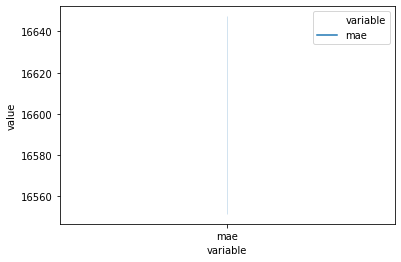

In [36]:
sns.lineplot(x='variable', y='value', hue='variable', data=temp_hyper)

In [44]:
#train a model and make predictions based on our lowest MAE from the grid search above

my_model = XGBRegressor(objective ='reg:squarederror',n_estimators=10000, learning_rate=.102, n_jobs=1)
my_model.fit(X_train, y_train, early_stopping_rounds=99, eval_set=[(X_valid, y_valid)], verbose=False)

preds_test = my_model.predict(X_test)

In [45]:
#save our predictions in submission format

output = pd.DataFrame({'Id': X_test.index, 'SalePrice': preds_test})

output.to_csv(r'D:/code/Data/house-prices-advanced-regression-techniques/house_sub_3.csv',index=False, header =1)